In [3]:
%cd ~/repo/protein-transfer

/home/t-fli/repo/protein-transfer


In [4]:
%load_ext blackcellmagic

In [3]:
from scr.preprocess.data_process import TaskProcess

In [ ]:
TaskProcess().sum_file_df

In [8]:
import os

from glob import glob

In [6]:
import pandas as pd

In [9]:
from scr.utils import pickle_load, get_task_data_split

In [73]:
class DatasetStripHistogram(BokehSave):
    def __init__(
        self,
        dataset_folder: str,
        split_order: list[str] | None = None,
        path2folder: str = "results/dataset_vis",
        plot_exts: list = PLOT_EXTS,
        plot_height: int = 300,
        plot_width: int = 450,
        axis_font_size: str = "10pt",
        title_font_size: str = "10pt",
        x_name: str = "",
        y_name: str = "fitness",
        gridoff: bool = True,
    ) -> None:
        """
        Args:
        - dataset_folder: str, ie. data/proeng/gb1
        - split_order: list[str], ie. ["low_vs_high, "two_vs_rest, "sampled]
        """

        self._dataset_folder = os.path.normpath(f"{dataset_folder}/*.pkl")

        assert "proeng" in self._dataset_folder, "only support proeng datasets"

        dfs = []

        for pkl in glob(self._dataset_folder):
            task, data, split = get_task_data_split(pkl)
            df = pickle_load(pkl)
            df["split"] = split
            df.loc[df["validation"] == True, "set"] = "val"

            dfs.append(df)
            print(dfs)
        
        if len(dfs) > 1:
            self._cat_dfs = pd.concat(dfs, ignore_index=True, axis=0)
        else:
            
            self._cat_dfs = dfs[0]

        set_order = ["train", "val", "test"]

        if split_order is None:
            cat_orders = set_order
        else:
            cat_orders = [(i, j) for i in split_order for j in set_order]

        self.bokeh_plot = striphistogram(
                self._cat_dfs,
                q="target",
                cats=["split", "set"],
                spread="jitter",
                # jitter=True,
                color_column="set",
                top_level="histogram",
                marker_kwargs={"alpha": 0.1},
                fill_kwargs={"fill_alpha": 0.1},
                order=cat_orders,
                # spread_kwargs={'distribution': 'normal', 'width': 0.1},
                q_axis="y",
            )

        super(DatasetStripHistogram, self).__init__(
            bokeh_plot=self.bokeh_plot,
            path2folder=path2folder,
            plot_name="-".join(get_task_data_split(self._dataset_folder)[:-1]),
            plot_exts=plot_exts,
            plot_height=plot_height,
            plot_width=plot_width,
            axis_font_size=axis_font_size,
            title_font_size=title_font_size,
            x_name=x_name,
            y_name=y_name,
            gridoff=gridoff,
        )

In [51]:
dfs = []
for pkl in glob("data/proeng/gb1/*.pkl"):
    task, data, split = get_task_data_split(pkl)
    df = pickle_load(pkl)
    df["split"] = split
    df.loc[df["validation"] == True, "set"] = "val"

    dfs.append(df)

In [52]:
cat_dfs = pd.concat(dfs, ignore_index=True, axis=0)
cat_dfs.head()

sequence  ...        split
0  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...  ...  low_vs_high
1  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...  ...  low_vs_high
2  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...  ...  low_vs_high
3  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...  ...  low_vs_high
4  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...  ...  low_vs_high

[5 rows x 7 columns]

In [24]:
"""For dataset vis"""

from __future__ import annotations

import os

from glob import glob

import pandas as pd

import iqplot

from scr.params.vis import PLOT_EXTS
from scr.vis.vis_utils import BokehSave
from scr.vis.iqplot_striphis import striphistogram
from scr.utils import get_task_data_split, read_std_csv, pickle_load, read_std_csv


class DatasetECDF(BokehSave):
    def __init__(
        self,
        dataset_path: str,
        path2folder: str = "results/dataset_vis",
        plot_exts: list = PLOT_EXTS,
        plot_height: int = 300,
        plot_width: int = 450,
        axis_font_size: str = "10pt",
        title_font_size: str = "10pt",
        x_name: str = "fitness",
        y_name: str = "ecdf",
        gridoff: bool = True,
    ) -> None:

        df = read_std_csv(dataset_path)

        df.loc[df["validation"] == True, "set"] = "val"

        self.bokeh_plot = iqplot.ecdf(
            df,
            q="target",
            cats="set",
            conf_int=True,
            # style="staircase",
            order=["train", "val", "test"],
            legend_location="bottom_right",
            marker_kwargs={"alpha": 0.5},
            fill_kwargs={"fill_alpha": 0.1}
            # line_kwargs={"line_width": 2.5},
        )

        super(DatasetECDF, self).__init__(
            bokeh_plot=self.bokeh_plot,
            path2folder=path2folder,
            plot_name="-".join(get_task_data_split(dataset_path)),
            plot_exts=plot_exts,
            plot_height=plot_height,
            plot_width=plot_width,
            axis_font_size=axis_font_size,
            title_font_size=title_font_size,
            x_name=x_name,
            y_name=y_name,
            gridoff=gridoff,
        )


class DatasetStripHistogram(BokehSave):
    def __init__(
        self,
        dataset_folder: str,
        split_order: list[str] | None = None,
        path2folder: str = "results/dataset_vis",
        plot_exts: list = PLOT_EXTS,
        plot_height: int = 400,
        plot_width: int = 600,
        axis_font_size: str = "10pt",
        title_font_size: str = "10pt",
        x_name: str = "",
        y_name: str = "fitness",
        gridoff: bool = True,
    ) -> None:
        """
        Args:
        - dataset_folder: str, ie. data/proeng/gb1
        - split_order: list[str], ie. ["low_vs_high", "two_vs_rest", "sampled"]
        """

        self._dataset_folder = os.path.normpath(dataset_folder)
        self._dataset_paths = glob(f"{self._dataset_folder}/*.pkl")

        assert "proeng" in self._dataset_folder, "only support proeng datasets"

        if len(self._dataset_paths) == 0:
            glob(f"{os.path.normpath(dataset_folder)}/*.csv")
            self._cat_dfs = read_std_csv(
                glob(f"{os.path.normpath(dataset_folder)}/*.csv")[0]
            )
            self._cat_dfs.loc[self._cat_dfs["validation"] == True, "set"] = "val"
        else:
            dfs = []
            for pkl in self._dataset_paths:
                task, data, split = get_task_data_split(pkl)
                df = pickle_load(pkl)
                df["split"] = split
                df.loc[df["validation"] == True, "set"] = "val"

            dfs.append(df)

            self._cat_dfs = pd.concat(dfs, ignore_index=True, axis=0)

        set_order = ["train", "val", "test"]

        if split_order is None:
            cat_orders = set_order
            cats_list = ["set"]
        else:
            cat_orders = [(i, j) for i in split_order for j in set_order]
            cats_list = ["split", "set"]

        self.bokeh_plot = striphistogram(
            self._cat_dfs,
            q="target",
            cats=cats_list,
            spread="jitter",
            # jitter=True,
            color_column="set",
            top_level="histogram",
            marker_kwargs={"alpha": 0.1},
            fill_kwargs={"fill_alpha": 0.1},
            order=cat_orders,
            # spread_kwargs={'distribution': 'normal', 'width': 0.1},
            q_axis="y",
        )

        super(DatasetStripHistogram, self).__init__(
            bokeh_plot=self.bokeh_plot,
            path2folder=path2folder,
            plot_name="-".join(get_task_data_split(self._dataset_folder)[:-1]),
            plot_exts=plot_exts,
            plot_height=plot_height,
            plot_width=plot_width,
            axis_font_size=axis_font_size,
            title_font_size=title_font_size,
            x_name=x_name,
            y_name=y_name,
            gridoff=gridoff,
        )

In [ ]:
DatasetStripHistogram("data/proeng/gb1", split_order=["low_vs_high", "two_vs_rest", "sampled"], plot_width=800)
DatasetStripHistogram("data/proeng/aav", split_order=["one_vs_many", "two_vs_many",])

In [20]:
pd.read_csv("data/proeng/thermo/mixed_split.csv").validation.unique()

array([nan, True], dtype=object)

In [23]:
DatasetStripHistogram("data/proeng/thermo", plot_width=400)

In [14]:
import iqplot

In [15]:
import pandas as pd

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

output_notebook() 

Loading BokehJS ...

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
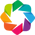

In [16]:
from __future__ import annotations

import os

import pandas as pd

import iqplot

import bokeh
from bokeh.io import show, export_svg, export_png
from bokeh.plotting import show, figure
from bokeh.models.annotations import Title

bokeh.io.output_notebook()

import holoviews as hv
from holoviews import dim

hv.extension("bokeh")



In [17]:
from scr.vis.iqplot_striphis import striphistogram

In [28]:
[(i, j) for i in ['low_vs_high', 'two_vs_rest', 'sampled'] for j in ["train", "val", "test"]]

[('low_vs_high', 'train'),
 ('low_vs_high', 'val'),
 ('low_vs_high', 'test'),
 ('two_vs_rest', 'train'),
 ('two_vs_rest', 'val'),
 ('two_vs_rest', 'test'),
 ('sampled', 'train'),
 ('sampled', 'val'),
 ('sampled', 'test')]

In [27]:
cat_dfs.split.unique()

array(['low_vs_high', 'two_vs_rest', 'sampled'], dtype=object)

In [47]:
from pandas.api.types import CategoricalDtype

In [48]:
cat_dfs["set"] = cat_dfs["set"].astype(CategoricalDtype(
    ["train", "val", "test"], 
    ordered=True
))
cat_dfs = cat_dfs.sort_values("set")
cat_dfs.head()

sequence  ...        split
7927  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGWLPEWTYD...  ...  low_vs_high
8629  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTQEWTYD...  ...  low_vs_high
8630  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTVEWTYD...  ...  low_vs_high
8631  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high
8632  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high

[5 rows x 7 columns]

In [53]:
cat_dfs.set = pd.Categorical(cat_dfs.set, categories = ["train", "val", "test"], ordered=True)
cat_dfs = cat_dfs.sort_values(["set"])
cat_dfs.head()

sequence  ...        split
7927  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGWLPEWTYD...  ...  low_vs_high
8629  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTQEWTYD...  ...  low_vs_high
8630  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTVEWTYD...  ...  low_vs_high
8631  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high
8632  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high

[5 rows x 7 columns]

In [54]:
cat_dfs.head()

sequence  ...        split
7927  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGWLPEWTYD...  ...  low_vs_high
8629  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTQEWTYD...  ...  low_vs_high
8630  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTVEWTYD...  ...  low_vs_high
8631  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high
8632  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGYTYEWTYD...  ...  low_vs_high

[5 rows x 7 columns]

In [55]:
sh = striphistogram(
        cat_dfs,
        q="target",
        cats=["split", "set"],
        spread="jitter",
        # jitter=True,
        color_column="set",
        top_level="histogram",
        marker_kwargs={"alpha": 0.1},
        fill_kwargs={"fill_alpha": 0.1},
        order=[(i, j) for i in ['low_vs_high', 'two_vs_rest', 'sampled'] for j in ["train", "val", "test"]],
        # spread_kwargs={'distribution': 'normal', 'width': 0.1},
        q_axis="y",
        
    )
show(sh)

In [56]:
from scr.vis.vis_utils import BokehSave

In [58]:
BokehSave(sh,
        path2folder = "results/dataset_vis",
        plot_name = "proeng gb1",
        plot_height = 400,
        plot_width = 600,
        # axis_font_size: str = "10pt",
        # title_font_size: str = "10pt",
        x_name = "",
        y_name = "fitness",)

In [24]:
test = hv.render(
            hv.Violin(df, kdims="set", vdims="target",).opts(
                # height=self._plot_height,
                # width=self._plot_width,
                # violin_fill_color=self._violin_fill_color,
                # cmap=self._cmap,
            )
        )